In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np




In [122]:
data = pd.read_csv('sales.csv', sep=',')
data.head(20)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


In [123]:
data.isnull().sum()

,0
TV,0
Radio,0
Newspaper,0
Sales,0


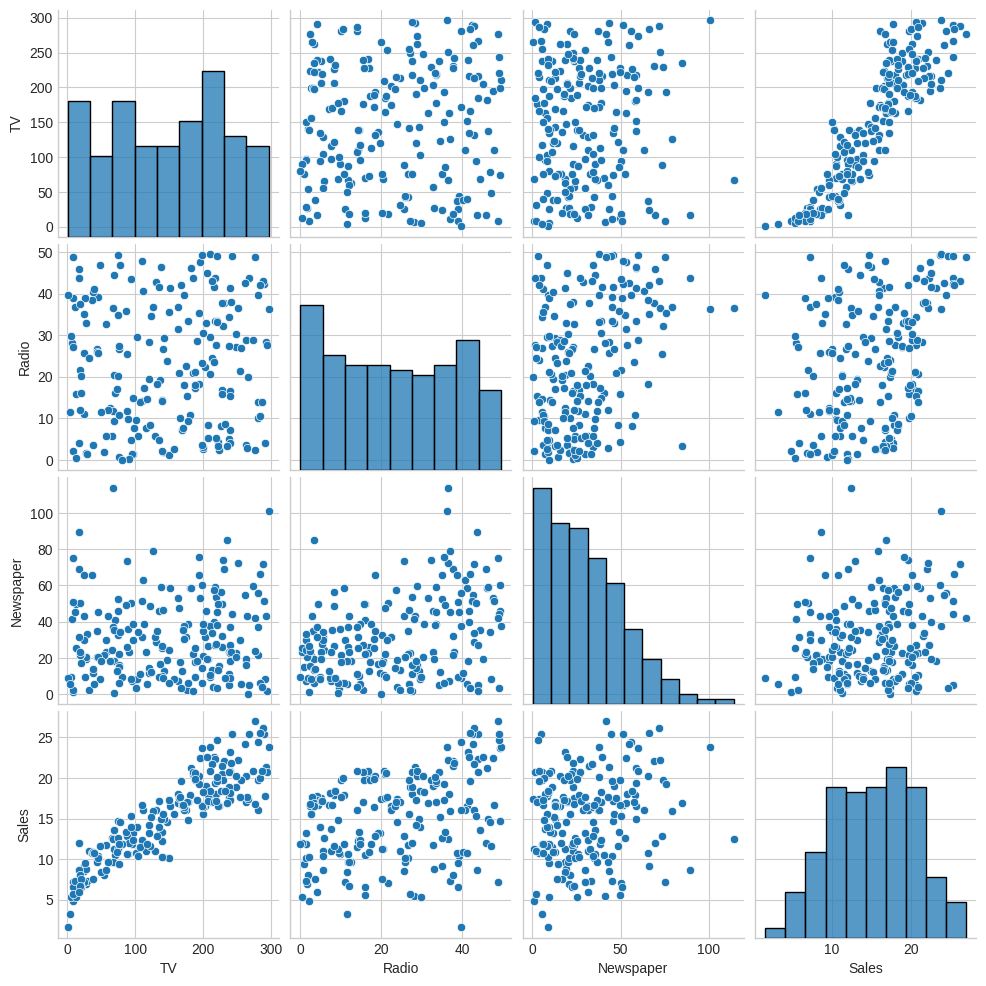

In [124]:
sns.pairplot(data, kind='scatter')


<ipython-input-125-0c964a6ebb84>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


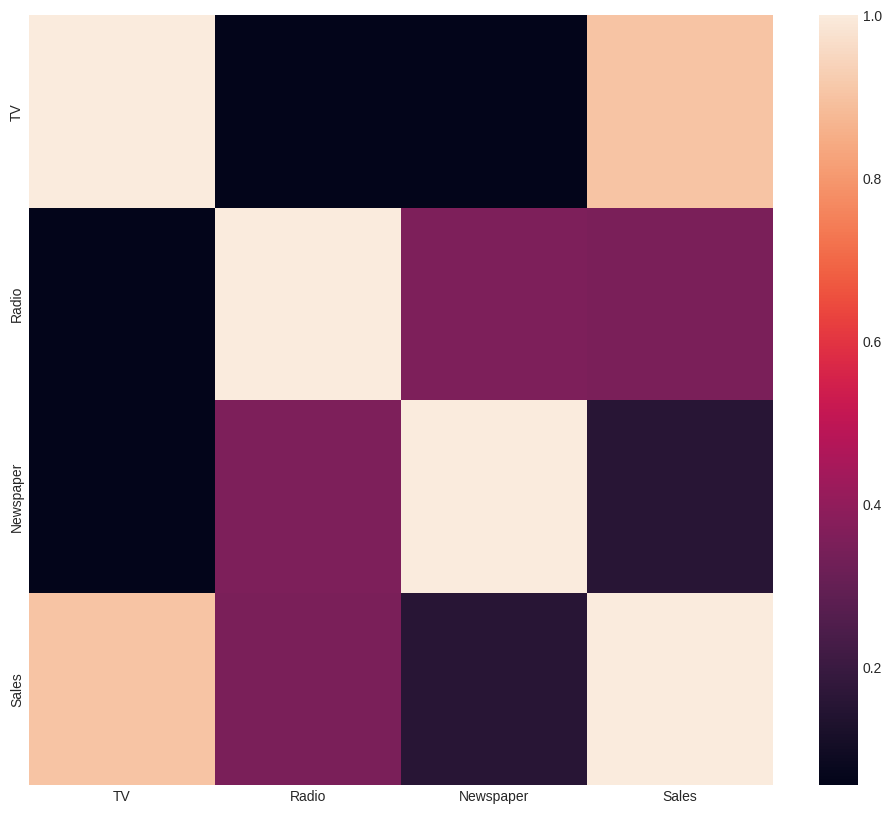

In [125]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr())
plt.show()

In [126]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

#scaler = StandardScaler()
#data[['TV', 'Radio','Newspaper']] = scaler.fit_transform(data[['TV', 'Radio', 'Newspaper']])

In [127]:
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [128]:
reg = LinearRegression()
reg.fit(X_train, y_train)
reg.score(X_test, y_test)


0.9059011844150826

In [129]:
reg.coef_

array([0.05450927, 0.10094536, 0.00433665])

In [130]:
# Create a DataFrame from the coefficients
coefficients = pd.DataFrame(reg.coef_, X.columns, columns=['Coefficient'])
print(coefficients)


           Coefficient
TV            0.054509
Radio         0.100945
Newspaper     0.004337


In [131]:
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)

model = sm.OLS(y_train, X_train_sm).fit()

p_values = model.pvalues[1:]

coefficients['P-value'] = p_values

print(coefficients)


           Coefficient       P-value
TV            0.054509  1.015317e-75
Radio         0.100945  9.206057e-20
Newspaper     0.004337  5.370630e-01


In [134]:
features = np.array([[100, 20, 10]])
predicted_sales = reg.predict(features)
print("Predicted Sales:", predicted_sales)

Predicted Sales: [12.2273272]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
